
# **Initiate and Configure Spark**

---


In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########

     |████████████████████████████████| 281.3 MB 32 kB/s 
     |████████████████████████████████| 198 kB 26.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=a693d8d1916959153ba062feb50fad1ce2424b24726050a4b604a485690bc70d
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('project').getOrCreate()

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"


# **Load Data**

---


In [ ]:
########## ONLY in Colab ##########
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')
########## ONLY in Colab ##########

Mounted at /content/drive


In [ ]:
# Load Data from Colab:

########## ONLY in Colab ##########
IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/IDS2018/*.csv")
########## ONLY in Colab ##########

In [ ]:
# Print DF to make sure it is working
IDS_df.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------------

In [ ]:
IDS_df1 = IDS_df.withColumnRenamed("Dst Port","Destination_port")\
    .withColumnRenamed("Protocol","protocol_type")\
    .withColumnRenamed("Timestamp","Time")\
    .withColumnRenamed("Flow Duration","Flow_Duration")\
    .withColumnRenamed("Tot Fwd Pkts","TotForward_Packets")\
    .withColumnRenamed("Tot Bwd Pkts","TotBackward_Packets")\
    .withColumnRenamed("TotLen Fwd Pkts","TotLength_Forward Packets")\
    .withColumnRenamed("TotLen Bwd Pkts","TotLegth_BackwardPackets")\
    .withColumnRenamed("Fwd Pkt Len Max","MaxLength_ForwardPackets ")\
    .withColumnRenamed("Fwd Pkt Len Min","MinLength_ForwardPackets")\
    .withColumnRenamed("Fwd Pkt Len Mean","Mean_LenOfFrwdPackets")\
    .withColumnRenamed("Fwd Pkt Len Std","StdDeviation_LenOfFrwdPackets")\
    .withColumnRenamed("Bwd Pkt Len Max","MaxLength_BackwardPackets")\
    .withColumnRenamed("Bwd Pkt Len Min","MinLength_BackwardPackets")\
    .withColumnRenamed("Bwd Pkt Len Mean","Mean_LenOfBkwdPackets")\
    .withColumnRenamed("Bwd Pkt Len Std","StdDeviation_LenOfBkwdPackets")\
    .withColumnRenamed("Flow Byts/s","Flow_Bytes_per_sec")\
    .withColumnRenamed("Flow Pkts/s","Flow_Packets_per_sec")\
    .withColumnRenamed("Flow IAT Mean","AvgTime_BtwnFlows")\
    .withColumnRenamed("Flow IAT Std","StdTime_BtwnFlows")\
    .withColumnRenamed("Flow IAT Max","MaxTime_BtwnFlows")\
    .withColumnRenamed("Flow IAT Min","MinTime_BtwnFlows")\
    .withColumnRenamed("Fwd IAT Tot","TotTime_BwtnFwdPackets")\
    .withColumnRenamed("Fwd IAT Mean","AvgTime_BtwnFwdPackets")\
    .withColumnRenamed("Fwd IAT Std","StdTime_BtwnFwdPackets")\
    .withColumnRenamed("Fwd IAT Max","MaxTime_BtwnFwdPackets")\
    .withColumnRenamed("Fwd IAT Min","MinTime_BtwnFwdPackets")\
    .withColumnRenamed("Bwd IAT Tot","TotTime_BwtnBkwdPackets")\
    .withColumnRenamed("Bwd IAT Mean","AvgTime_BtwnBkwdPackets")\
    .withColumnRenamed("Bwd IAT Std","StdTime_BtwnBkwdPackets")\
    .withColumnRenamed("Bwd IAT Max","MaxTime_BtwnFwdPackets")\
    .withColumnRenamed("Bwd IAT Min","MinTime_BtwnBkwdPackets")\
    .withColumnRenamed("Fwd PSH Flags","Fwd_PSH_Flags")\
    .withColumnRenamed("Bwd PSH Flags","Bwd_PSH_Flags")\
    .withColumnRenamed("Fwd URG Flags","Fwd_URG_Flags")\
    .withColumnRenamed("Bwd URG Flags","Bwd_URG_Flags")\
    .withColumnRenamed("Fwd Header Len","Fwd_Header_Len")\
    .withColumnRenamed("Bwd Header Len","Bwd_Header_Len")\
    .withColumnRenamed("Fwd Pkts/s","Fwd_Pkts_per_s")\
    .withColumnRenamed("Bwd Pkts/s","Bwd_Pkts_per_s")\
    .withColumnRenamed("Pkt Len Min","Pkt_Len_Min")\
    .withColumnRenamed("Pkt Len Max","Pkt_Len_Max")\
    .withColumnRenamed("Pkt Len Mean","Pkt_Len_Mean")\
    .withColumnRenamed("Pkt Len Std","Pkt_Len_Std")\
    .withColumnRenamed("Pkt Len Var","Pkt_Len_Var")\
    .withColumnRenamed("FIN Flag Cnt","FIN_Flag_Cnt")\
    .withColumnRenamed("SYN Flag Cnt","SYN_Flag_Cnt")\
    .withColumnRenamed("RST Flag Cnt","RST_Flag_Cnt")\
    .withColumnRenamed("PSH Flag Cnt","PSH_Flag_Cnt")\
    .withColumnRenamed("ACK Flag Cnt","ACK_Flag_Cnt")\
    .withColumnRenamed("URG Flag Cnt","URG_Flag_Cnt")\
    .withColumnRenamed("URG Flag Cnt","URG_Flag_Cnt")\
    .withColumnRenamed("CWE Flag Count","CWE_Flag_Cnt")\
    .withColumnRenamed("ECE Flag Cnt","ECE_Flag_Cnt")\
    .withColumnRenamed("Down/Up Ratio","Down_per_Up_Ratio")\
    .withColumnRenamed("Pkt Size Avg","Pkt_Size_Avg")\
    .withColumnRenamed("Fwd Seg Size Avg","Fwd_Seg_Size_Avg")\
    .withColumnRenamed("Bwd Seg Size Avg","Bwd_Seg_Size_Avg")\
    .withColumnRenamed("Fwd Byts/b Avg","Fwd_Byts_per_b_Avg")\
    .withColumnRenamed("Fwd Pkts/b Avg","Fwd_Pkts_per_b_Avg")\
    .withColumnRenamed("Fwd Blk Rate Avg","Fwd_Blk_Rate_Avg")\
    .withColumnRenamed("Bwd Byts/b Avg","Bwd_Byts_per_b_Avg")\
    .withColumnRenamed("Bwd Pkts/b Avg","Bwd_Pkts_per_b_Avg")\
    .withColumnRenamed("Bwd Blk Rate Avg","Bwd_Blk_Rate_Avg")\
    .withColumnRenamed("Subflow Fwd Pkts","Subflow_Fwd_Pkts")\
    .withColumnRenamed("Subflow Fwd Byts","Subflow_Fwd_Byts")\
    .withColumnRenamed("Subflow Bwd Pkts","Subflow_Bwd_Pkts")\
    .withColumnRenamed("Subflow Bwd Byts","Subflow_Bwd_Byts")\
    .withColumnRenamed("Init Fwd Win Byts","Init_Fwd_Win_Byts")\
    .withColumnRenamed("Init Bwd Win Byts","Init_Bwd_Win_Byts")\
    .withColumnRenamed("Fwd Act Data Pkts","Fwd_Act_Data_Pkts")\
    .withColumnRenamed("Fwd Seg Size Min","Fwd_Seg_Size_Min")\
    .withColumnRenamed("Active Mean","Active_Mean")\
    .withColumnRenamed("Active Std","Active_Std")\
    .withColumnRenamed("Active Max","Active_Max")\
    .withColumnRenamed("Active Min","Active_Min")\
    .withColumnRenamed("Idle Mean","Idle_Mean")\
    .withColumnRenamed("Idle Std","Idle_Std")\
    .withColumnRenamed("Idle Max","Idle_Max")\
    .withColumnRenamed("Idle Min","Idle_Min")
   
IDS_df1.show()

+----------------+-------------+-------------------+-------------+------------------+-------------------+-------------------------+------------------------+-------------------------+------------------------+---------------------+-----------------------------+-------------------------+-------------------------+---------------------+-----------------------------+------------------+--------------------+-----------------+-----------------+-----------------+-----------------+----------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+-----------------------+-----------------------+----------------------+-----------------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+------------+------------+

In [ ]:
# The total number of attacks per label
IDS_df1.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               Label|  count|
+--------------------+-------+
|              Benign|6112145|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193360|
|      SSH-Bruteforce| 187589|
|       Infilteration| 161934|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
|               Label|     45|
+--------------------+-------+



In [ ]:
IDS_df1.createOrReplaceTempView("IDS_df1")


# **Task 1: Spark SQL [30 marks]**

---



+-------------------+------------------+
|               Time|              flow|
+-------------------+------------------+
|14/02/2018 10:38:42| 822406.6566208139|
|14/02/2018 10:44:39| 487797.0289825932|
|14/02/2018 10:45:51|2688968.8197957166|
|14/02/2018 10:50:07| 5472920.521361418|
|14/02/2018 10:50:54|1479353.4870422264|
|14/02/2018 10:54:05| 2242553.037945111|
|14/02/2018 10:55:01| 4203146.096621084|
+-------------------+------------------+



Text(0.5, 1.0, 'flow VS Time')

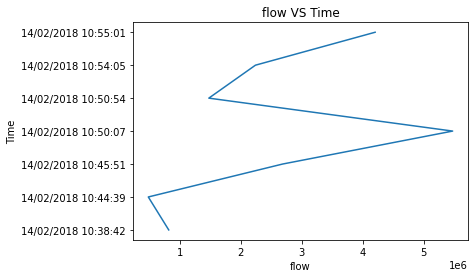

In [ ]:
# Query 1 [Briefly explain]: Selected records on the basis of Time for the comparison of Flow_Bytes_per_sec with time
import pandas as pd
import matplotlib.pyplot as plt
Q1_df = spark.sql("SELECT Time, SUM(Flow_Bytes_per_sec) as flow FROM IDS_df1 WHERE Flow_Bytes_per_sec != 'Infinity' and  Flow_Bytes_per_sec != 'NaN' GROUP By Time Limit 7")
Q1_df.show()
comparison_with_time = Q1_df.toPandas()
plt.plot(comparison_with_time['flow'],comparison_with_time['Time'])
plt.xlabel('flow')
plt.ylabel('Time')
plt.title('flow VS Time')

+----------------+--------------------+--------------------+
|Destination_port|connection_terminate|establish_connection|
+----------------+--------------------+--------------------+
|           52800|                 0.0|                 2.0|
|           55371|                 0.0|                 0.0|
|           53277|                 0.0|                 2.0|
|           55551|                 0.0|                 1.0|
|           52493|                 0.0|                 0.0|
|           37347|                 0.0|                 2.0|
|           52497|                 0.0|                 2.0|
|           55141|                 0.0|                 0.0|
|           53290|                 0.0|                 1.0|
|           55263|                 0.0|                 1.0|
|           52475|                 0.0|                 1.0|
|           52635|                 0.0|                 0.0|
|           52445|                 0.0|                 1.0|
|           55615|      

Text(0.5, 1.0, 'establish_connection VS connection_terminate')

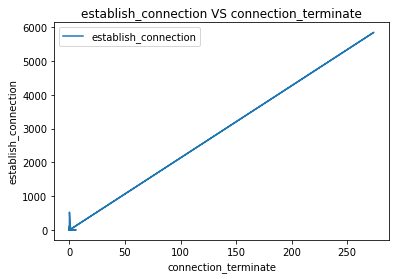

In [ ]:
# Query 2 [Briefly explain]: Filter the data on basis of Label as Infilteration and selected port, count of FIN and SYN Flag on basis of port and plot relationship between FIN and SYN Flag on bais of port
Q1_df = spark.sql("SELECT Destination_port, SUM(FIN_Flag_Cnt) as connection_terminate, SUM(SYN_Flag_Cnt) as establish_connection FROM IDS_df1 WHERE Label = 'Infilteration' GROUP BY Destination_port")
Q1_df.show()
pandas_df = Q1_df.toPandas()
pandas_df.plot(x='connection_terminate',y='establish_connection')
plt.xlabel('connection_terminate')
plt.ylabel('establish_connection')
plt.title('establish_connection VS connection_terminate')


+-----------+---------------------------------+
|Port_Number|Protocol_violation_on_Port_Number|
+-----------+---------------------------------+
|         80|                          2030631|
|         53|                          1614231|
|        443|                           806466|
|       3389|                           744365|
|         21|                           333583|
+-----------+---------------------------------+



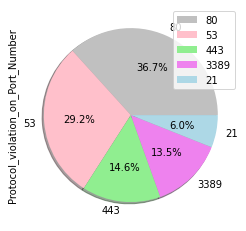

In [ ]:
# Query 3 [Briefly explain]: Captured all vulnerable data and selected port, protocol type and count of violation of protocol type on basis of port
Q2_df = spark.sql("SELECT Destination_port as Port_Number,count(Destination_port) as Protocol_violation_on_Port_Number FROM IDS_df1 WHERE Label != 'Label' Group By Destination_port Order By count(*) DESC LIMIT 5")
Q2_df.show()
pandas_df = Q2_df.toPandas()
my_labels = pandas_df['Port_Number']
my_colors = ['silver','pink','lightgreen','violet','lightblue']
pandas_df.plot(labels = my_labels,autopct='%1.1f%%',shadow = True, colors=my_colors,x ='Port_Number', y='Protocol_violation_on_Port_Number', kind = 'pie')

+-----------+-------------------------+
|Port_Number|CountOf_Forwarded_Packets|
+-----------+-------------------------+
|        443|              1.3661248E7|
|       3389|                7590312.0|
|         80|                5559868.0|
|         53|                1862468.0|
|        445|                1287517.0|
|          0|                 825299.0|
+-----------+-------------------------+



Text(0.5, 1.0, 'Count of Forward Packets per Port_Number')

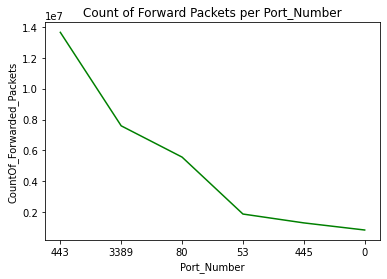

In [ ]:
# Query 4 [Briefly explain]: refined benign attacked ports and selected Forward Packet count by port number.
import matplotlib.pyplot as plt
Q2_df1 = spark.sql("SELECT Distinct(Destination_port) as Port_Number, SUM(TotForward_Packets) as CountOf_Forwarded_Packets FROM IDS_df1 WHERE Label = 'Benign' Group By Destination_port Order By CountOf_Forwarded_Packets DESC  LIMIT 6 ")
Q2_df1.show()
pandas_df = Q2_df1.toPandas()
plt.plot(pandas_df['Port_Number'],pandas_df['CountOf_Forwarded_Packets'] , color='green')
plt.xlabel('Port_Number')
plt.ylabel('CountOf_Forwarded_Packets')
plt.title('Count of Forward Packets per Port_Number')

+-------------------+-----------------+
|               Time|Number_of_Attacks|
+-------------------+-----------------+
|14/02/2018 01:00:06|               12|
|14/02/2018 01:00:05|               12|
|14/02/2018 01:00:02|               17|
|14/02/2018 01:00:03|               15|
|14/02/2018 01:00:04|               11|
|14/02/2018 01:00:07|                8|
|14/02/2018 01:00:09|               21|
|14/02/2018 01:00:01|                9|
|14/02/2018 01:00:08|               12|
|14/02/2018 01:00:00|               14|
+-------------------+-----------------+



Text(0.5, 1.0, 'Number of Attacks for 10 seconds')

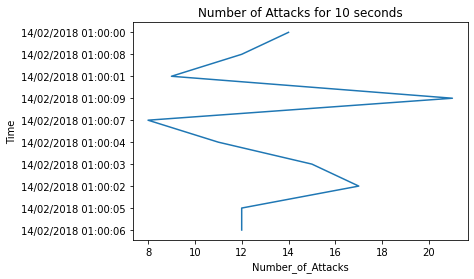

In [ ]:
# Query 5 [Briefly explain]: Fetched Number of Attacks on basis of Time for interval of 10 seconds
import matplotlib.pyplot as plt
Q3_df = spark.sql("SELECT Time, COUNT(Label) as Number_of_Attacks FROM IDS_df1 WHERE Time>= '14/02/2018 01:00:00' and Time< '14/02/2018 01:00:10' Group By Time")
Q3_df.show()

devil = Q3_df.toPandas()
plt.plot(devil['Number_of_Attacks'],devil['Time'])
plt.xlabel('Number_of_Attacks')
plt.ylabel('Time')
plt.title('Number of Attacks for 10 seconds')

+-------------+--------------------+-------------+
|Flow_Duration|Flow_Packets_per_sec|        Label|
+-------------+--------------------+-------------+
|      5061043|        1.9758773043|SQL Injection|
|           43|    46511.6279069767|SQL Injection|
|      5011561|        1.5963090143|SQL Injection|
|           13|    153846.153846154|SQL Injection|
|     12903217|        2.0925014281|SQL Injection|
|           12|    166666.666666667|SQL Injection|
|      5002019|        1.5993541808|SQL Injection|
|      5007516|        1.5975984899|SQL Injection|
|           23|    86956.5217391304|SQL Injection|
|      5007459|        1.5976166754|SQL Injection|
+-------------+--------------------+-------------+



Text(0.5, 1.0, 'Packet Flow VS Duration Of Flow')

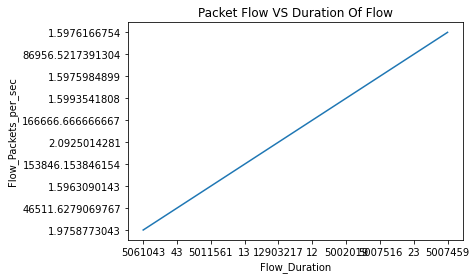

In [ ]:
# Query 6 [Briefly explain]: Compared Flow of packets per sec and Flow Duration on basis of SQL Injection threat.
import matplotlib.pyplot as plt
Q3_df = spark.sql("SELECT Flow_Duration, Flow_Packets_per_sec, Label FROM IDS_df1 WHERE Label='SQL Injection' Limit 10")
Q3_df.show()
packetsVSflow = Q3_df.toPandas()
plt.plot(packetsVSflow['Flow_Duration'],packetsVSflow['Flow_Packets_per_sec'])
plt.xlabel('Flow_Duration')
plt.ylabel('Flow_Packets_per_sec')
plt.title('Packet Flow VS Duration Of Flow')


# **Task 2 - Part1: PySpark [45 marks]**

---


               flow
count  8.700000e+01
mean   3.315727e+06
std    2.892604e+06
min    1.200000e+01
25%    5.400000e+01
50%    5.007238e+06
75%    5.010835e+06
max    1.290322e+07


Text(0.5, 1.0, 'Description of Flow')

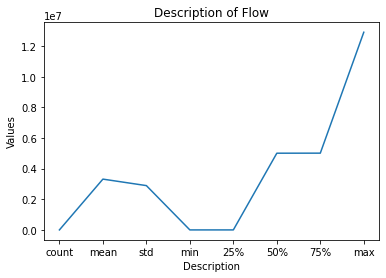

In [ ]:
# Analytical method 1: Described Flow Duration on basis of descriptive statistics
import matplotlib.pyplot as plt
Q1_df = IDS_df1.filter("Label = 'SQL Injection'").select(IDS_df1.Flow_Duration.alias('flow'))
pandasdf = Q1_df.toPandas().astype(int)
print(pandasdf.describe())
plt.plot(pandasdf.describe())
plt.xlabel('Description')
plt.ylabel('Values')
plt.title('Description of Flow')


Text(0.5, 1.0, 'pearson correlation between duration of flow, forward and backward packets')

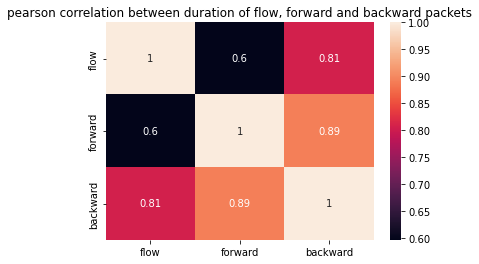

In [ ]:
# Analytical method 2: Finded the pearson correlation between duration of flow, forward and backward packets.
import matplotlib.pyplot as plt
import seaborn as sns
Q1_df = IDS_df1.filter("Label = 'SQL Injection'").select(IDS_df1.Flow_Duration.alias('flow'),IDS_df1.TotForward_Packets.alias('forward'),IDS_df1.TotBackward_Packets.alias('backward'))
pandasdf = Q1_df.toPandas().astype(int)
sns.heatmap(pandasdf.corr(),annot=True)
plt.title('pearson correlation between duration of flow, forward and backward packets')


In [ ]:
# Analytical method 3: Performed the T test on flow duration
from scipy.stats import ttest_1samp
import numpy as np
Q1_df = IDS_df1.filter("Label = 'SQL Injection'").select(IDS_df1.Flow_Duration.alias('flow'))
pandasdf = Q1_df.toPandas().astype(int)
print(pandasdf['flow'])
flow_mean = np.mean(pandasdf['flow'])
print(flow_mean)
tset, pval = ttest_1samp(pandasdf['flow'], 200)
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")


0      5061043
1           43
2      5011561
3           13
4     12903217
        ...   
82          46
83         277
84         331
85         313
86         190
Name: flow, Length: 87, dtype: int64
3315726.9310344825
1.831279042150082e-17
 we are rejecting null hypothesis


sizepersec    15.137698
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


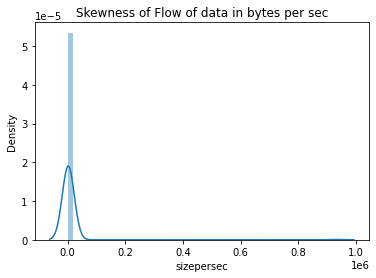

In [ ]:
# Analytical method 4: Calculated skewness of Flow of data in bytes per sec
import numpy as np
import seaborn as sns
Q2_df = IDS_df1.filter("Label = 'Brute Force -XSS'").select(IDS_df1.Flow_Bytes_per_sec.alias('sizepersec'))
pandasdf = Q2_df.toPandas().astype(float)
print(pandasdf.skew())
plt.figure()
sns.distplot(pandasdf['sizepersec'])
plt.title('Skewness of Flow of data in bytes per sec')
plt.show()


In [ ]:
# Analytical method 5: calculated kendaltau correlation between forward packet length and backward packet length
from scipy.stats import kendalltau
Q2_df = IDS_df1.filter("Label = 'Brute Force -XSS'").select(IDS_df1.TotForward_Packets.alias('forward'),IDS_df1.TotBackward_Packets.alias('backward'))
pandasdf = Q2_df.toPandas().astype(float)
coef, p = kendalltau(pandasdf['forward'],pandasdf['backward']) 
print('coef =',coef,'p =', p )
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated  p=%.3f' % p)
else:
	print('Samples are correlated  p=%.3f' % p)


coef = 0.8215030593093774 p = 1.3161540814478204e-42
Samples are correlated  p=0.000


In [ ]:
# Analytical method 6: Performed Z test on forward packet length by using mean value 156
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
Q2_df = IDS_df1.filter("Label = 'Brute Force -XSS'").select(IDS_df1.TotForward_Packets.alias('forward'))
pandasdf = Q2_df.toPandas().astype(float)
ztest ,pval = stests.ztest(pandasdf['forward'], x2=None, value=156)
print('ztest',ztest,'pval',pval)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


ztest -8.948426905562858 pval 3.6058410073122367e-19
3.6058410073122367e-19
reject null hypothesis


      affectedMachine
0.25             53.0
0.50            443.0
0.75          34376.0


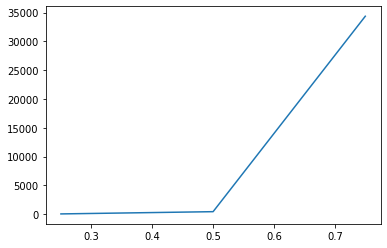

In [ ]:
# Analytical method 7: Calculated quantile on port number 
import matplotlib.pyplot as plt
Q2_df = IDS_df1.filter("Label = 'Benign'").select(IDS_df1.Destination_port.alias('affectedMachine'))
pandasdf = Q2_df.toPandas().astype(int)
print(pandasdf.quantile([.25, .5, .75]))
plt.plot(pandasdf.quantile([.25, .5, .75]))


In [ ]:
# Analytical method 8: finded out spearman correlation between port and protocol
from scipy.stats import spearmanr
Q2_df = IDS_df1.filter("Label = 'Benign'").select(IDS_df1.Destination_port.alias('affectedMachine'),IDS_df1.protocol_type.alias('protocol'))
pandasdf = Q2_df.toPandas().astype(int)
coef, p = spearmanr(pandasdf['affectedMachine'],pandasdf['protocol']) 
print('coef =',coef,'p =', p )
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)


coef = -0.646426656086975 p = 0.0
Samples are correlated (reject H0) p=0.000


In [ ]:
# Analytical method 9: performed f test on affected machine and protocol
import pandas as pd
from scipy import stats
Q2_df = IDS_df1.filter("Label = 'Benign'").select(IDS_df1.Destination_port.alias('affectedMachine'),IDS_df1.protocol_type.alias('protocol'))
pandasdf = Q2_df.toPandas().astype(float)
grps = pd.unique(pandasdf.affectedMachine.values)
d_data = {grp:pandasdf['protocol'][pandasdf.affectedMachine == grp] for grp in grps}
F, p = stats.f_oneway(d_data[0], d_data[0], d_data[80])
print ('F',F,'p',p)
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


F 14151163.135506108 p 0.0
p-value for significance is:  0.0
reject null hypothesis



# **Task 2 - Part2: PySpark [15 marks]**

---


Predicted value for Termination: ['0']


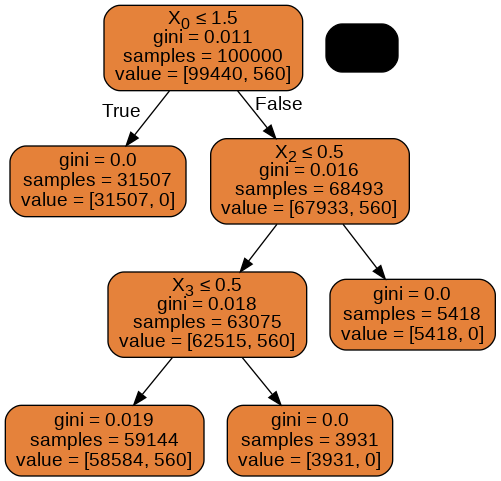

In [ ]:
# Machine Learning Technique: Decision Tree Clasifier Machine learning Algorithm
# What to achieve: Predicting the value of FIN Flag by using sampled data of port, protocol, URG flag and SYN flag
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
Q1_df = IDS_df1.filter("Label IN ('SQL Injection', 'Brute Force -Web', 'Brute Force -XSS', 'Benign')").select(IDS_df1.Destination_port.alias('VulnerableMachine'),IDS_df1.protocol_type.alias('protocol'),IDS_df1.Label,IDS_df1.URG_Flag_Cnt.alias('UrgentInfo'),IDS_df1.SYN_Flag_Cnt.alias('Establishment'),IDS_df1.FIN_Flag_Cnt.alias('Termination')).limit(100000)
dataset = Q1_df.toPandas()
X = dataset.iloc[:,:-1]
y= dataset.iloc[:,5]
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
regressor = DecisionTreeClassifier()
regressor.fit(X.iloc[:,1:5].values,y)
X_in = np.array([1,1,0,0])
y_pred = regressor.predict([X_in])
print('Predicted value for Termination:',y_pred)
dot_data = StringIO()
export_graphviz(regressor, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image('tree.png')

Model slope:     1.046020276194142
Model intercept: 235216.75537777832


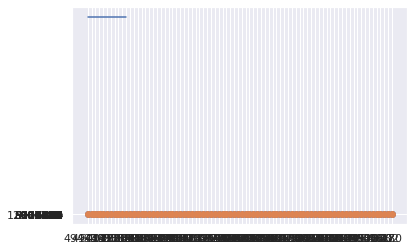

In [ ]:
# Machine Learning Technique:Linear Regression
# What to achieve:Trying to achieve linear relationship between MaxTime_BtwnFlows and Flow_Duration within SQL Injection.
from pyspark.ml.regression import LinearRegression 
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Load training data
Q2_df = IDS_df1.filter("Label = 'SQL Injection'").select(IDS_df1.MaxTime_BtwnFlows.alias('MaxGap'),IDS_df1.Flow_Duration.alias('flow'))
pandasdf = Q2_df.toPandas()
xa = pandasdf['MaxGap']
x = np.array(xa)
ya = pandasdf['flow']
y = np.array(ya)
plt.scatter(x, y);
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)


In [ ]:
# Machine Learning Technique: KNN Method
# What to achieve: Using sampled data of Total Forward Packets and Total Backward Packets to predict the value of label on basis of hypothetical value of Forward Packets equal 51 and backward packet equal to 51
from sklearn .neighbors import KNeighborsClassifier
import numpy as np
Q3_df = IDS_df1.filter("Label IN ('Infilteration', 'SSH-Bruteforce')").select(IDS_df1.TotForward_Packets.alias('forwardPacketsCount'),IDS_df1.TotBackward_Packets.alias('backwardPacketCount'),IDS_df1.Label)
dataset = Q3_df.toPandas()
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,2].values
Classifier = KNeighborsClassifier(n_neighbors = 3)
Classifier.fit(X,y)
X_test = np.array([51,51])
y_pred = Classifier.predict([X_test])
print("General KNN Class:", y_pred)


General KNN Class: ['Infilteration']


# **Convert ipynb to HTML for Turnitin submission [10 marks]**

---



In [ ]:
# install nbconvert
!pip3 install nbconvert


# convert ipynb to html
# file name: "Your_Group_ID_CN7031.ipynb
!jupyter nbconvert --to html BigDataAnalytics.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook BigDataAnalytics.ipynb to html
[NbConvertApp] Writing 738164 bytes to BigDataAnalytics.html
